<a href="https://colab.research.google.com/gist/pallavidevpriya/55bec426b072b82f87544b76767c9f0a/clustering-retail-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

import pandas as pd 
# Read data from file 'item_to_id.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
item = pd.read_csv("/content/gdrive/My Drive/New Folder/item_to_id.csv") 
# Preview the first 5 lines of the loaded data 
item.head()
# Read data from file 'purchase_history.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
purchase = pd.read_csv("/content/gdrive/My Drive/New Folder/purchase_history.csv") 
# Preview the first 5 lines of the loaded data 
purchase.head()





,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [0]:
item.sort_index(inplace=True)
item.head()


,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [0]:
from collections import Counter
import itertools

In [0]:
def item_counts(same_user_df):
    all_item = same_user_df['id'].str.split(',').sum()
    return pd.Series(Counter(int(id) 
    for id in all_item))


In [0]:
user_item_counts = purchase.groupby("user_id").apply(item_counts).unstack(fill_value=0)

In [0]:

user_item_counts.shape

(24885, 48)

In [0]:
user_item_counts.sample(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1449513,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,2,1,0,1,0,0,0,1,0
733529,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
887740,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,0,0
510802,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0
1116710,0,2,1,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,1,1,0,0,1,0,1,0,0,2,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0


In [0]:
#The customer who bought the most items overall in her lifetime
user_item_total = user_item_counts.sum(axis=1)
user_item_total

print("customer who bought most in lifetime is: {} bought {} items".format(user_item_total.idxmax(),user_item_total.max()))

custom who bought most in lifetime is: 269335 bought 72 items


In [0]:
#For each item, the customer who bought that product the most
max_item = user_item_counts.apply(lambda s: pd.Series([s.argmax(), s.max()], index=["max_user", "max_count"]))
max_item = max_item.transpose()
max_item.index.name = "Item_id"
max_item = max_item.join(item).loc[:, ["Item_name", "max_user", "max_count"]]
max_item

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


,Item_name,max_user,max_count
Item_id,,,
1,tea,31625,4
2,juice,31625,5
3,soda,154960,4
4,sandwich loaves,5289,3
5,dinner rolls,217277,3
6,tortillas,334664,4
7,bagels,175865,3
8,canned vegetables,151926,3
9,spaghetti sauce,269335,4


In [0]:
#Cluster items based on user co-purchase history. That is, create clusters of products that have the highest probability of being bought together
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Let's Normalize each item
item_norm = normalize(user_item_counts.values, axis=0)
item_item_similarity = item_norm.T.dot(item_norm)
item_item_similarity = pd.DataFrame(item_item_similarity,index=user_item_counts.columns,columns=user_item_counts.columns)
item_item_similarity.head()

Item_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
Item_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.506895,0.420145,0.296986,0.271132,0.388250,0.271743,0.335303,0.403690,0.390641,0.263889,0.260103,0.392767,0.336052,0.258082,0.338954,0.386424,0.338680,0.273667,0.391199,0.339366,0.344111,0.397598,0.272608,0.398554,0.351104,0.338670,0.357550,0.270909,0.259259,0.264944,0.395828,0.275207,0.403212,0.262791,0.345662,0.395159,0.401602,0.388034,0.390286,0.358599,0.393056,0.395696,0.396766,0.390253,0.394998,0.392164,0.328221
2,0.506895,1.000000,0.466874,0.322744,0.285125,0.468199,0.312200,0.390521,0.464872,0.527894,0.287562,0.308481,0.468146,0.381629,0.307159,0.388076,0.467605,0.403438,0.309625,0.459227,0.387422,0.403866,0.464785,0.324615,0.461502,0.408279,0.395842,0.413566,0.313440,0.286279,0.293666,0.465128,0.324176,0.463119,0.301622,0.398677,0.460136,0.472178,0.462968,0.462548,0.409401,0.529100,0.464579,0.527325,0.521058,0.462407,0.460257,0.380077
3,0.420145,0.466874,1.000000,0.277325,0.224537,0.358326,0.238133,0.301868,0.362091,0.352597,0.220416,0.229447,0.351296,0.298039,0.228277,0.302368,0.354865,0.314452,0.238778,0.351047,0.303000,0.315513,0.354034,0.243633,0.365767,0.312490,0.308293,0.315465,0.235667,0.218117,0.222883,0.364168,0.252364,0.350432,0.237600,0.306910,0.346805,0.361159,0.351093,0.368199,0.309078,0.357794,0.351209,0.362522,0.361922,0.354933,0.351832,0.297972
4,0.296986,0.322744,0.277325,1.000000,0.162860,0.247414,0.166012,0.216166,0.252662,0.258313,0.161984,0.159560,0.257197,0.217385,0.165753,0.214511,0.255397,0.217752,0.177168,0.248604,0.218641,0.228902,0.254682,0.164328,0.253267,0.215711,0.208580,0.211507,0.181481,0.154847,0.151258,0.252048,0.179928,0.256595,0.169257,0.222490,0.256908,0.250911,0.245623,0.261272,0.210767,0.244946,0.253282,0.253119,0.250190,0.253835,0.260541,0.218717
5,0.271132,0.285125,0.224537,0.162860,1.000000,0.233618,0.164699,0.203245,0.239445,0.234254,0.207374,0.158428,0.228620,0.192514,0.149977,0.192332,0.228049,0.208622,0.161543,0.233812,0.206701,0.207060,0.234705,0.153947,0.237727,0.207160,0.207497,0.218936,0.147741,0.210961,0.207412,0.229354,0.156806,0.228453,0.154249,0.207663,0.233278,0.241332,0.235543,0.238557,0.211006,0.238466,0.235064,0.241835,0.238087,0.238247,0.232387,0.188269


In [0]:
pca = PCA()
items_rotated = pca.fit_transform(item_item_similarity)
items_rotated = pd.DataFrame(items_rotated,index=user_item_counts.columns,columns=["pc{}".format(index+1) for index in range(item.shape[0])])

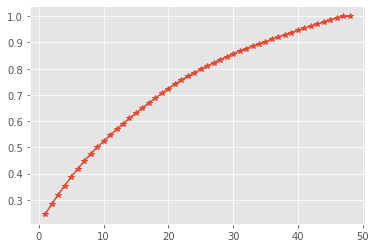

In [0]:
# The total variance explained by first K principle components

explained_variance_by_k = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1,len(explained_variance_by_k)+1),explained_variance_by_k,marker="*")

In [0]:

def show_clusters(items_rotated,labels):
    
    fig = plt.figure(figsize=(15, 15))
    colors =  itertools.cycle (["b","g","r","c","m","y","k"])

    grps = items_rotated.groupby(labels)
    for label,grp in grps:
        plt.scatter(grp.pc1,grp.pc2,c=next(colors),label = label)

        names = item.loc[ grp.index,"Item_name"]
        for index, name in enumerate(names):
            print("\t<{}> {}".format(index+1,name))

    # Annotate
    for itemid in items_rotated.index:
        x = items_rotated.loc[itemid,"pc1"]
        y = items_rotated.loc[itemid,"pc2"]
        name = item.loc[itemid,"Item_name"]
        name = re.sub('\W', ' ', name)
        plt.text(x,y,name)


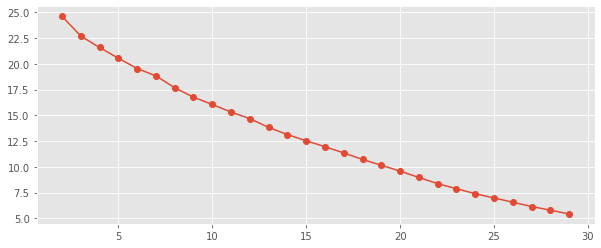

In [0]:
def cluster(n_clusters,n_components=48):
    
    print("first {} PC explain {:.1f}% variances".format(n_components,
                                                         100 * sum(pca.explained_variance_ratio_[:n_components])))

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(items_rotated.values[:, :n_components])

    show_clusters(items_rotated, kmeans.labels_)
# Choose best K 
inertias = []
silhouettes = []

ks = range(2,30)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(items_rotated)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(items_rotated, kmeans.predict(items_rotated)))
fig = plt.figure(figsize=(10,4))
plt.plot(ks, inertias,marker='o')

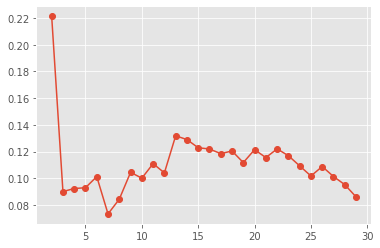

In [0]:
plt.plot(ks,silhouettes,marker='o')

In [0]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

first 48 PC explain 100.0% variances
	<1> ice cream
	<2> laundry detergent
	<1> waffles
	<2> pork
	<3> carrots
	<4> aluminum foil
	<5> baby items
	<1> dinner rolls
	<2> cheeses
	<3> apples
	<1> lettuce
	<1> bagels
	<2> butter
	<3> beef
	<4> cauliflower
	<1> juice
	<2> ketchup
	<3> shampoo
	<4> hand soap
	<5> shaving cream
	<1> milk
	<2> cucumbers
	<3> dishwashing 
	<4> toilet paper
	<1> canned vegetables
	<2> yogurt
	<3> cereals
	<4> frozen vegetables
	<5> nan
	<1> bananas
	<2> cherries
	<3> sandwich bags
	<1> sandwich loaves
	<1> soda
	<2> tortillas
	<3> flour
	<4> pet items
	<1> tea
	<2> spaghetti sauce
	<3> poultry
	<4> paper towels
	<5> soap
	<1> sugar
	<2> berries
	<1> eggs
	<2> pasta
	<3> grapefruit
	<1> broccoli


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


KeyError: ignored

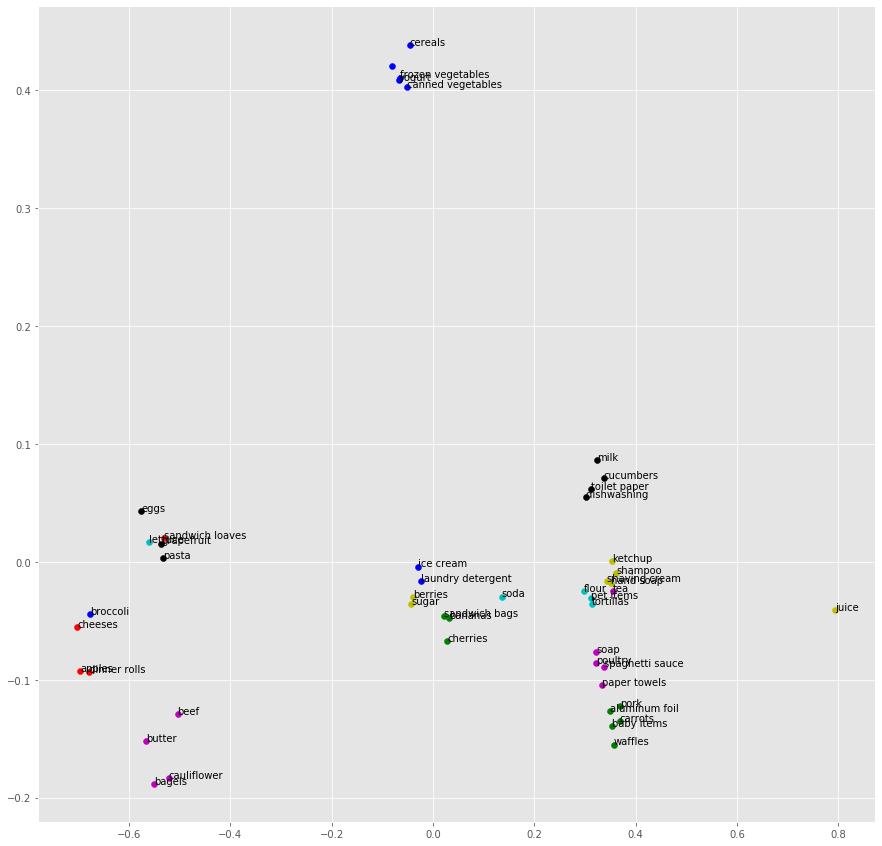

In [0]:

x=cluster(n_clusters=15)
x